# Introduction

Bringing awareness to suicide and suicidal thoughts is very dear to my heart. Growing up in Brooklyn, NY suicide was always forbidden fruit to. Granted, it could have been because the people I were around just did not take mental health seriously. It wasn’t until after I became comfortable enough to admit that my depression left me in a suicidal state and I had thoughts of ending it all after the loss of a loved one, that I started to take mental health my seriously, seek help, and educate the people around me.

Suicide has not only affected me personally, but is one of the biggest problems in the world and has increased a significant amount around the world annually. There are a lot of factors that play a role in why people attempt and commit suicide such as mental health issues, suffering from a loss, and chronic illnesses just to name a few. Despite there being an ample amount of factors to why people contemplate or commit suicide, I will be taking few variables from the data set and I will check their relationship with suicide numbers throughout the world. I will be analyzing both men and women from mostly all age groups with I hope that this project will be able to shed light on suicide awareness and show people that it is okay to be vulnerable and seek help. We should not have to take on all of our struggles alone, sometimes it is okay for the “strong friend” to ask for help when it is needed.

[“Suicide is one of the leading causes of death among all American adults and rates are increasing in both men and women”](https://www.ssmhealth.com/blogs/ssm-health-matters/october-2019/middle-aged-men-more-likely-to-die-by-suicide)

In [7]:
from PIL import Image
from IPython.display import display

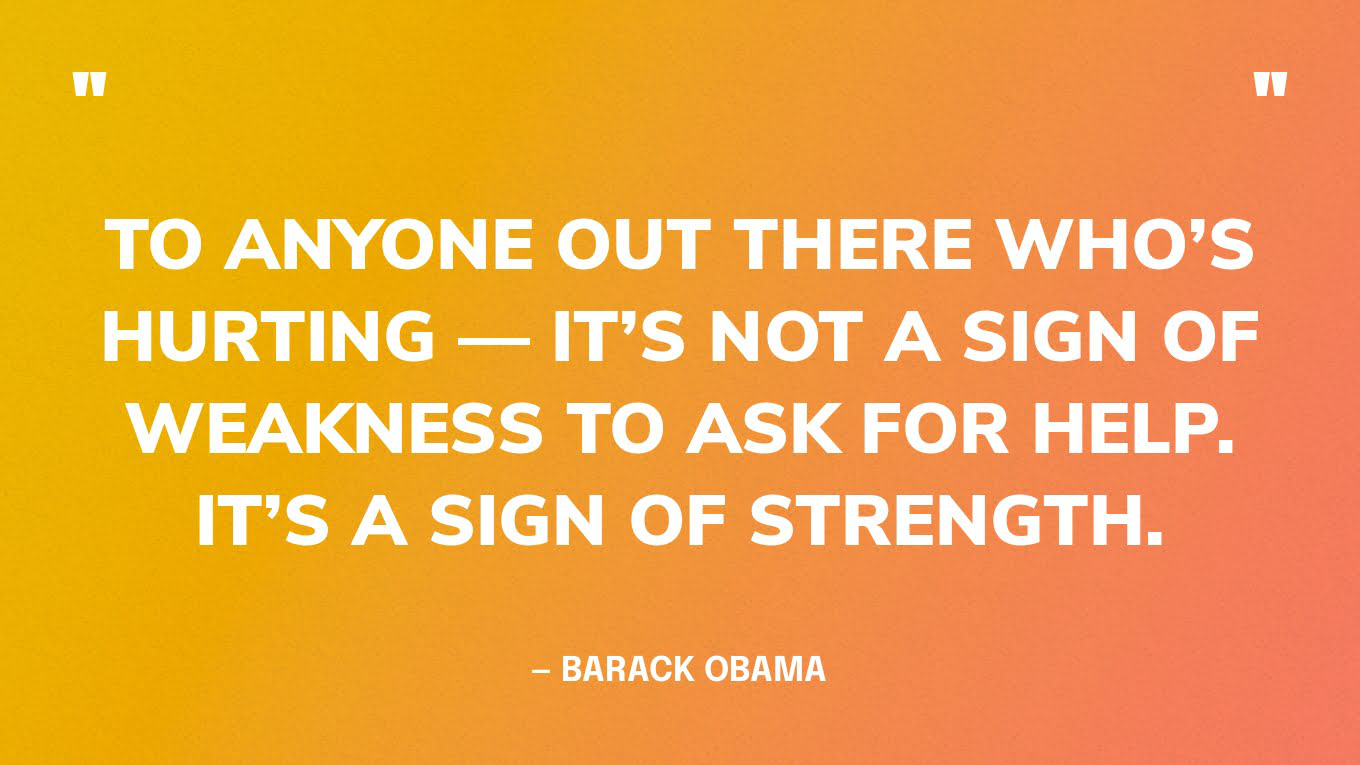

In [8]:
img = Image.open('/Users/MECCA/Downloads/63061ee7b83d2a28d64c47ed_suicide-quotes-about-7.jpeg')
display(img)

# Data

I found the data used for this project on Kaggle. This data set can be downloaded free of charge from (https://www.kaggle.com/datasets/russellyates88/suicide-rates-overview-1985-to-2016). This compiled data set pulled from four other data sets linked by time and place, and was built to find signals correlated to increased suicide rates among different cohorts globally, across the socio-economic spectrum.

# Loading the data set

In [9]:
import pandas as pd

In [10]:
# Load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/Meccamarshall/Data602/main/Finalproject/master%20suicide.csv')

In [11]:
# Display the first few rows of the dataset to understand its structure
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k population,Year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,1987,NaN,"$2,156,624,900.00",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,1987,NaN,"$2,156,624,900.00",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,1987,NaN,"$2,156,624,900.00",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,1987,NaN,"$2,156,624,900.00",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,1987,NaN,"$2,156,624,900.00",796,Boomers


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [13]:
# Grouping data by different categories to see the distribution of suicides
group_by_age = data.groupby('age')['suicides_no'].sum()
group_by_sex = data.groupby('sex')['suicides_no'].sum()
group_by_country = data.groupby('country')['suicides_no'].sum().sort_values(ascending=False)

In [14]:
# Plotting
plt.figure(figsize=(18, 5))

<Figure size 1800x500 with 0 Axes>

<Figure size 1800x500 with 0 Axes>

Research Question 1: Which year has the most suicides? Which year has the least suicides?

In [15]:
# Grouping data by year to find the year with the most and least suicides
group_by_year = data.groupby('year')['suicides_no'].sum()


In [16]:
# Finding the year with the most and the least suicides
year_most_suicides = group_by_year.idxmax()
year_least_suicides = group_by_year.idxmin()
most_suicides = group_by_year.max()
least_suicides = group_by_year.min()

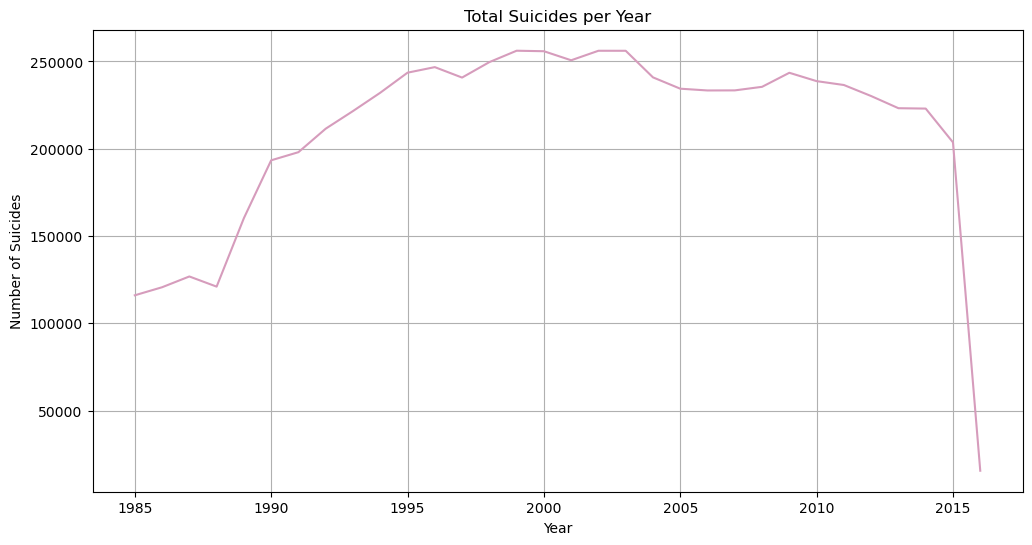

((1999, 256119), (2016, 15603))

In [68]:
# Plotting suicides over years
plt.figure(figsize=(12, 6))
group_by_year.plot(color='#d69cbc')
plt.title('Total Suicides per Year')
plt.xlabel('Year')
plt.ylabel('Number of Suicides')
plt.grid(True)
plt.show()

(year_most_suicides, most_suicides), (year_least_suicides, least_suicides)


From observing my line plot I noticed that suicide rates before 1990s were less than 150K annually. This low rate could be due to awareness of mental health and suicide in the 80s. After noticing this I decided to do more research and found out that this is accurate, as the research, “Suicide in the elderly” supports this claim.” The line graph also shows that 1999 had the highest amount of suicides with a total of 256,119 and 2016 had the lowest amount of suicides with a total of 15,603.

[“Female suicide rates have shown a similar overall decrease, falling by between 45 and 60% during the years 1983–1995 in the 45–84 age group.”](https://www.cambridge.org/core/journals/advances-in-psychiatric-treatment/article/suicide-in-the-elderly/A4A9F7695DCA8D9B2796453FF166B8F3)

# Research Question 2: Which country has the most Suicides? Which country has the least Suicides?

In [46]:
#Finding the grand total population per country.
group_by_population = data.groupby('country')['population'].sum()
print(group_by_population)

country
Albania                   62325467
Antigua and Barbuda        1990228
Argentina               1035985431
Armenia                   77348173
Aruba                      1259677
                           ...    
United Arab Emirates      36502275
United Kingdom          1738767780
United States           8054027201
Uruguay                   84068943
Uzbekistan               486422532
Name: population, Length: 101, dtype: int64


Text(0, 0.5, 'Number of Suicides')

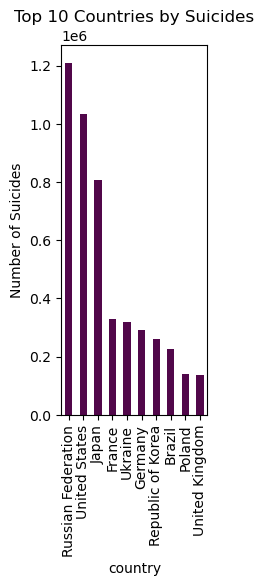

In [69]:
plt.subplot(1, 3, 3)
group_by_country.head(10).plot(kind='bar', color='#51074a')
plt.title('Top 10 Countries by Suicides')
plt.ylabel('Number of Suicides')

In [42]:
# Finding the country/state with the most and the least suicides
country_most_suicides = group_by_country.idxmax()
country_least_suicides = group_by_country.idxmin()
most_suicides_country = group_by_country.max()
least_suicides_country = group_by_country.min()

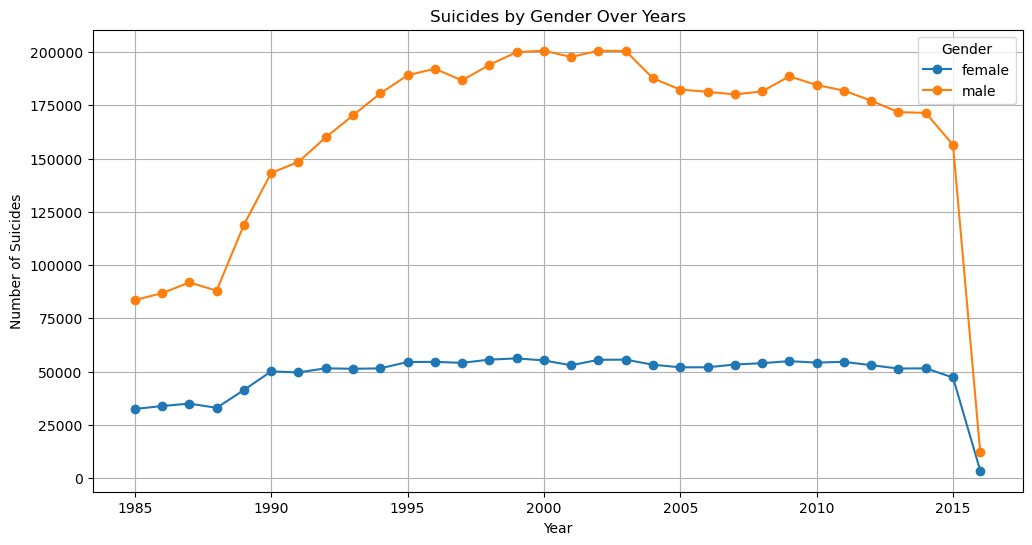

(('Russian Federation', 1209742), ('Saint Kitts and Nevis', 0))

In [79]:
gender_suicides = data.groupby(['year', 'sex'])['suicides_no'].sum().unstack()
gender_suicides.plot(figsize=(12, 6), marker='o')
plt.title('Suicides by Gender Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Suicides')
plt.grid(True)
plt.legend(title='Gender')
plt.show()

(country_most_suicides, most_suicides_country), (country_least_suicides, least_suicides_country)

Both the graph & the min/max function above, confirms that St. Kitts had the lowest suicide count, while Russian Federation, had the largest suicide count. A reason the Russian Federations may have a large suicide count may be because they have a very large population (St. Kitts have a population of 47.6K, while Russian Federation has of population of 144.3 million). It has been reported that Russian levels of alcohol consumption plays an immense role in it’s large suicide count, but there is a lack of data to support this due to Soviet secrecy.

[“Russian levels of alcohol consumption and suicide are among the highest in the world.”](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1642767/)

# Research Question 3: Are certain age groups more inclined to suicide?

In [58]:
# Grouping and analyzing data by age group
suicides_by_age_group = data.groupby('age')['suicides_no'].sum().sort_values(ascending=False)


Text(0, 0.5, 'Number of Suicides')

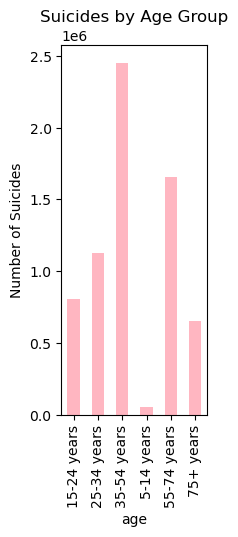

In [82]:
# Plot by age
plt.subplot(1, 3, 1)
group_by_age.plot(kind='bar', color='#ffb6c1')
plt.title('Suicides by Age Group')
plt.ylabel('Number of Suicides')

The bar graph shows that ages 35 through 54, have the highest suicide count. While ages 55 through 74 have the second highest suicide count. This high suicide rate in adults 35 and older can be due to the “U-Shape Happiness Curve. When people reach middle age they may review their earlier goals in the context of their achievements. For some, the realization of unmet aspirations or the perceived failure to have accomplished goals set as young adults could lead to a midlife low.

[The U-shape of Happiness Across the Life Course: Expanding the Discussion](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7529452/)

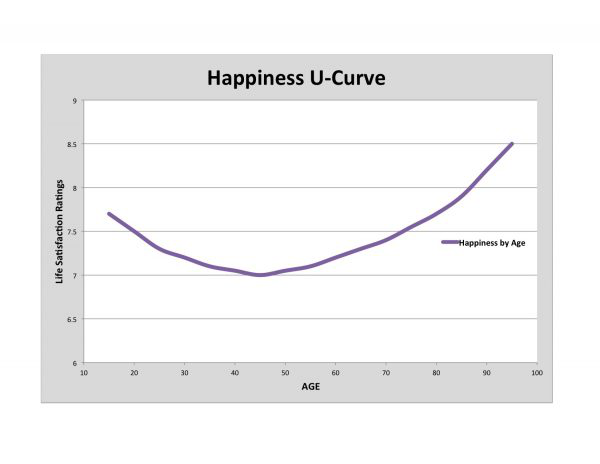

In [56]:
img = Image.open('/Users/MECCA/Downloads/Happiness-U-Curve-600x464.jpeg')
display(img)

# Research Question 3: Which gender is more likely to commit suicide?

In [59]:
# Grouping and analyzing data by gender
suicides_by_gender = data.groupby('sex')['suicides_no'].sum()


Text(0, 0.5, 'Number of Suicides')

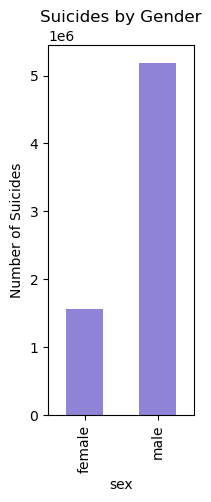

In [83]:
# Plot by sex
plt.subplot(1, 3, 2)
group_by_sex.plot(kind='bar', color='#8f83d8')
plt.title('Suicides by Gender')
plt.ylabel('Number of Suicides')


From the above chart, it shows that men are more likely to commit suicide than women. Why is that? For years boys and e=men have been told that it is not okay to cry and showing emotions make them less manly. Despite both women and men dealing with depression, women are more likely than men to seek help for it. Men take strong value in independence and purposefulness, and they sometimes believe that admitting that they need help as a sign of weakness and avoid it. Meanwhile, despite women valuing their independence that are willing to consult friends and are more likely to accept help.

[“Men seek help for mental health less often,” Harkavy-Friedman says. “It’s not that men don’t have the same issues as women – but they’re a little less likely to know they have whatever stresses or mental health conditions that are putting them at greater risk for suicide.”](https://www.bbc.com/future/article/20190313-why-more-men-kill-themselves-than-women)

# Conclusion:
Despite suicide having a decrease before the 1990’s, it is now at an all time high. Suicide is something that should be talked about more often because if more people are aware that they are not alone, they would possibly be more comfortable reaching out for help before it is too late. It is evident that middle aged men are more likely to commit suicide and the difference between men and women suicide rates are pretty alarming. Mental health is something that should not be brushed off because it is a major predictor for suicide. If you know someone who is suffering please use the resources below below.

# Where to get help:

[988 Suicide and Crisis Lifeline](https://988lifeline.org/?utm_source=google&utm_medium=web&utm_campaign=onebox)

# Refrences:

(https://www.ssmhealth.com/blogs/ssm-health-matters/october-2019/middle-aged-men-more-likely-to-die-by-suicide)
(https://www.cambridge.org/core/journals/advances-in-psychiatric-treatment/article/suicide-in-the-elderly/A4A9F7695DCA8D9B2796453FF166B8F3)
(https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1642767/)
(https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7529452/)
(https://www.bbc.com/future/article/20190313-why-more-men-kill-themselves-than-women)